In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

%matplotlib inline

# English Sentiment Analysis
Here we compare two different easily accessible and usable libraries for sentiment analysis: __TextBlob__ and __Vader__.
## Pre-processing

In [83]:
# Import data
df = pd.read_json("data\8oct_pre_processed_stemmed.json", orient='records', lines=True)

In [84]:
# Remove URLs, hashtags and @-mentions
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False) # URLs
df['text'] = df['text'].str.replace('(?i)\#\w+', '', case=False) # hashtags
df['text'] = df['text'].str.replace('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)', '', case=False) # @user mentions

df['PosOrNeg'] = ""
df = df[df.is_retweet == 0]

df_en = df[df.lang == "en"]
df_other = df[df.lang != "en"]

### TextBlob
Let's apply TextBlob, note that we can do this in just one line with the original text: 
* __TextBlob__ doesn't need stemming or removing of stop words. 

In [31]:
df_en['polarity_blob'] = df_en['text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

C:\Python36\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Vader
Applying Vader is just as easy. Here we will only take the __compound__-component of the score and omit others. For our purposes binary classification is enough.

In [85]:
analyser = SentimentIntensityAnalyzer()
df_en['polarity_vader'] = df_en['text'].apply(lambda tweet: analyser.polarity_scores(tweet)['compound'])

C:\Python36\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Results and comparison

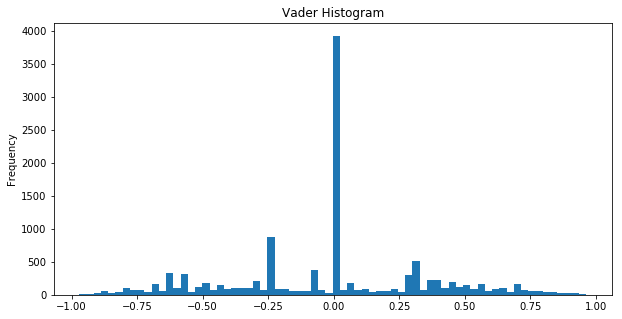

In [73]:
df_en['polarity_vader'].plot.hist(figsize=(10,5), bins=70, title="Vader Histogram")

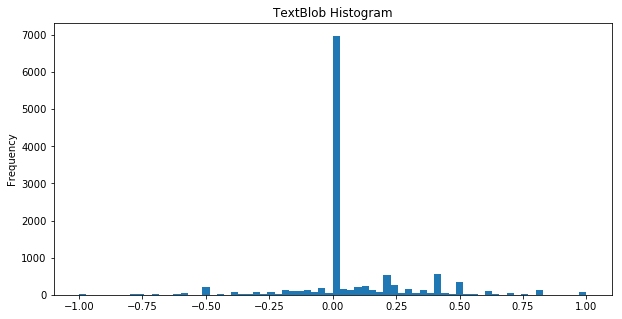

In [34]:
df_en['polarity_blob'].plot.hist(figsize=(10,5), bins=70, title="TextBlob Histogram")

In [28]:
pd.options.display.max_colwidth = 1000

In [35]:
df_en[['text', 'polarity_blob', 'polarity_vader']][0:100]


,text,polarity_blob,polarity_vader
2,Why is the _Commission turning a blind eye to this?,-0.500000,-0.4019
6,"Britain needs to lead, why isn't May speaking up for Catalonia? We should encourage others to LEAVE and j…",0.000000,0.3328
10,"Images on fascists for the union in Barcelona. Sad to call for union of Spain against independence of Catalonia, by…",-0.500000,-0.5994
13,"Catalonia’s Independence Referendum, in Photographs",0.000000,0.0000
28,Wishing to see the independent circus Cataluña broke &amp; misery This is what bastards deserve!!,0.000000,-0.8802
37,And the material conditions of Armenian proletariat has dropped. “but at least there is independence /s” 😒,-0.300000,0.0000
57,Catalan President Puigdemont has 'independence at his core' via JusSwaggTV,0.000000,0.0000
65,"Catalonia yes, Catalonia not, but, meanwhile, the central gang of thieves is still stealing.",0.000000,-0.8641
70,Pro-Spain supporters make fascist salutes ahead of demonstration via,0.000000,-0.0772
72,Now they chose to make photos and become bystanders while one week before they chose to fire bullets at people will…,0.000000,-0.3400


## Transform for Binary classification
We chose to use __Vader__ because for our data it seemed to be perform better. We also thought about taking a weighted average of the two, but after a discussion we thoght that averaging could yield us worse performance. Here we classify the real-values extracted of the __Vader__ to integer-values.

In [86]:
df_en['PosOrNeg'] = df_en['polarity_vader']
df_en.PosOrNeg[df_en.PosOrNeg == 0.0] = None
df_en.PosOrNeg[df_en.PosOrNeg > 0.0] = 1.0
df_en.PosOrNeg[df_en.PosOrNeg < 0.0] = 0.0


C:\Python36\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python36\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Python36\Anaconda\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Python36\Anaconda\lib\site-packages\I

In [80]:
df_en[['PosOrNeg', 'polarity_vader']]

,PosOrNeg,polarity_vader
2,0.0,-0.4019
6,1.0,0.3328
10,0.0,-0.5994
13,NaN,0.0000
28,0.0,-0.8802
37,NaN,0.0000
57,NaN,0.0000
65,0.0,-0.8641
70,0.0,-0.0772
72,0.0,-0.3400


In [87]:
# Let's add the classified english data together with the non-english (unclassified)   
df = pd.concat([df_en,df_other])

In [94]:
df

,coordinates,created_at,favorite_count,favorited,hashtags,id,id_str,infl_score,is_retweet,lang,...,user_created_at,user_defined_location,user_followers_count,user_geo_enabled,user_id,user_name,user_screen_name,withheld_in_countries,polarity_vader,PosOrNeg
2,None,2017-10-08 20:16:35,2,False,[catalanreferendum],917121568991477760,917121568991477760,2,0,en,...,2011-10-19 23:32:13,Gibraltar,1555,False,394361523,Kaelan Joyce,KaelanJoyce,None,-0.4019,0
6,None,2017-10-08 20:16:34,0,False,[],917121563132121088,917121563132121088,0,0,en,...,2012-05-22 13:42:23,"England, United Kingdom",223,False,587515740,strangedean,strangedean,None,0.3328,1
10,None,2017-10-08 20:16:32,0,False,[],917121555133534210,917121555133534208,0,0,en,...,2012-01-10 23:35:34,Brey,85,False,460628867,Ptolomeo Petain VI,ptolomew,None,-0.5994,0
13,None,2017-10-08 21:25:29,119,False,[],917138907501924352,917138907501924352,482,0,en,...,2008-09-25 00:47:00,Massachusetts/Barcelona,31895,False,16444025,Liz Castro,lizcastro,None,0,NaN
28,None,2017-10-08 20:16:26,0,False,[],917121530139734022,917121530139734016,0,0,en,...,2014-07-21 19:20:41,SOTOGRANDE Cadiz republica del kichi,91,True,2720010400,F J Lorca Navarrete,LorcaNava,None,-0.8802,0
37,None,2017-10-08 20:16:23,0,False,[],917121515144933376,917121515144933376,0,0,en,...,2016-08-31 10:37:22,Occupied Chumash Land,148,False,770933492154716165,☭ Raneg ☭,_Raneg_,None,0,NaN
57,None,2017-10-08 20:16:17,0,False,[jussoyouknow],917121490193133569,917121490193133568,0,0,en,...,2009-11-27 16:06:23,"Washington, DC",4404,False,92995708,Jus Swagg,iDJswagg,None,0,NaN
65,None,2017-10-08 20:16:12,0,False,[],917121469322334209,917121469322334208,0,0,en,...,2012-09-09 12:55:41,Badalona,349,True,813081055,Miquel Picas II*II,MIPICE,None,-0.8641,0
70,None,2017-10-08 20:16:09,2,False,[],917121457980887041,917121457980887040,5,0,en,...,2012-02-23 11:36:08,País Valencià,402,True,500702912,Vicent Monroig,Vicent_Monroig,None,-0.0772,0
72,None,2017-10-08 20:16:08,1,False,[],917121452117319680,917121452117319680,1,0,en,...,2014-06-26 21:17:37,Wrocław,738,False,2590299619,Przemysław Hankus,mr_hanki,None,-0.34,0


In [88]:
# Save to file
df.to_json('data\8oct_pre_processed_stemmed_polarity.json', orient='records', lines=True)